In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohansacharya/graduate-admissions")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\smc\.cache\kagglehub\datasets\mohansacharya\graduate-admissions\versions\2


In [2]:
import pandas as pd
import os
file=os.listdir(path)
file

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']

In [3]:
df=pd.read_csv(os.path.join(path , 'Admission_Predict_Ver1.1.csv'))

In [4]:
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [5]:
df.drop(columns='Serial No.' , inplace=True, )

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2 , random_state=42)

In [9]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [10]:
scale= MinMaxScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

In [11]:
x_test_scale

array([[ 0.88      ,  0.85714286,  0.75      ,  0.75      ,  0.57142857,
         0.87820513,  1.        ],
       [ 0.48      ,  0.57142857,  0.75      ,  0.875     ,  0.71428571,
         0.71794872,  1.        ],
       [ 0.5       ,  0.46428571,  0.25      ,  0.25      ,  0.28571429,
         0.2724359 ,  0.        ],
       [ 0.44      ,  0.60714286,  0.5       ,  0.5       ,  0.42857143,
         0.60576923,  0.        ],
       [ 0.72      ,  0.71428571,  0.5       ,  0.625     ,  0.42857143,
         0.72115385,  1.        ],
       [ 0.78      ,  0.67857143,  0.75      ,  0.875     ,  0.71428571,
         0.77884615,  1.        ],
       [ 0.        ,  0.28571429,  0.        ,  0.125     ,  0.14285714,
         0.24358974,  0.        ],
       [ 0.22      ,  0.5       ,  0.75      ,  0.375     ,  0.42857143,
         0.53525641,  0.        ],
       [ 0.56      ,  0.60714286,  0.5       ,  0.625     ,  0.71428571,
         0.77564103,  1.        ],
       [ 0.6       ,  0.7142

In [12]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense 

In [13]:
model=Sequential()
model.add(Dense(7, activation='relu',input_dim=7))
model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\smc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='mean_squared_error',optimizer='Adam', metrics=['accuracy'])

In [17]:
history=model.fit(x_train_scale, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.0000e+00 - loss: 0.5492 - val_accuracy: 0.0000e+00 - val_loss: 0.5290
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.4961 - val_accuracy: 0.0000e+00 - val_loss: 0.4873
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.4555 - val_accuracy: 0.0000e+00 - val_loss: 0.4477
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.4079 - val_accuracy: 0.0000e+00 - val_loss: 0.4100
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.3901 - val_accuracy: 0.0000e+00 - val_loss: 0.3730
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.3478 - val_accuracy: 0.0000e+00 - val_loss: 0.3371
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.3064 - val_accuracy: 0.0000e+00 - val_loss: 0.3016
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - ac

In [18]:
y_pred=model.predict(x_test_scale)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7470745077997485

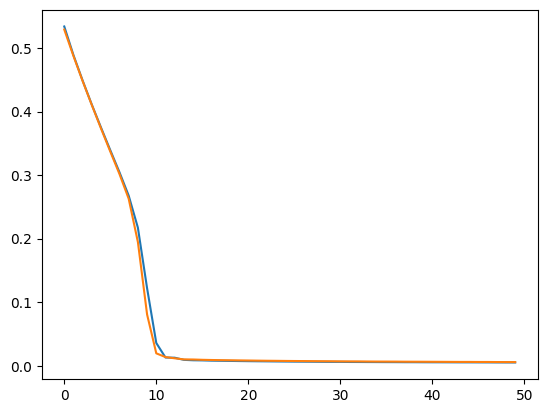

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

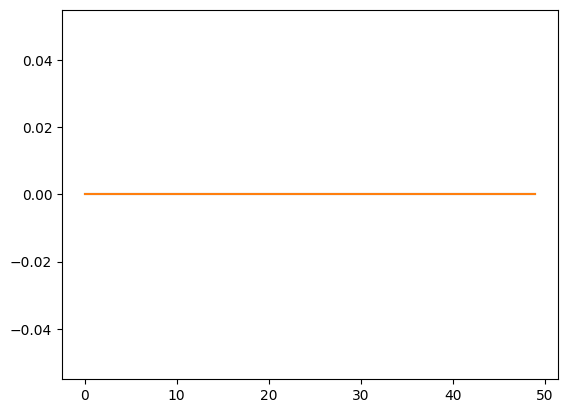

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])